In [42]:
#!pip install ibis
#!pip install ibis-framework[impala]
#!pip install ibis-framework
#!pip install ibis-framework[kerberos]
#!pip install pyhive
#!pip install sasl
#!wget https://www.lfd.uci.edu/~gohlke/pythonlibs/#sasl
#!pip install sasl-0.2.1-cp36-cp36m-win_amd64.whl
#!pip install sql
#!pip install ipython-sql
#!conda install -c conda-forge ipython-sql=0.3.6
!pip install config

  Stored in directory: C:\Users\con031\AppData\Local\pip\Cache\wheels\51\7d\db\0e38d2ec57843d00cc39f8df3686984ccec689694f7bc78a38
Successfully built config


In [48]:
import ibis as ibis
import pandas as pd
#import os

In [49]:
#hdfs = ibis.hdfs_connect(host=os.environ['192.168.101.41'], port=50070)
#client = ibis.impala.api.connect(host='192.168.101.41', port=21050)
#hdfs = ibis.hdfs_connect(host='192.168.101.41', port=50070)

In [50]:
#import hive from pyhive
#from pyhive import hive

#establish the connection to the db
#conn = hive.Connection(host='192.168.101.41', port='21050', auth='CUSTOM', database='employee', username='hue', password='hue')

#prepare the cursor for the queries
#cursor = conn.cursor()

#execute a query
#cursor.execute("SHOW TABLES")

#navigate and display the results 
#for table in cursor.fetchall():
#    print(table)

In [51]:
from impala.dbapi import connect

In [52]:
conn = connect(host='192.168.101.41', port=21050)

In [53]:
cur = conn.cursor()

cur.execute('select * from employee.employee_details limit 2')

cur.fetchall()

[('21', 'test21', 'admin', 'Development', 40000.0),
 ('22', 'test22', 'admin', 'Development', 40000.0)]

In [54]:
cur = conn.cursor()

cur.execute('select * from employee.employee_details')

from impala.util import as_pandas
df = as_pandas(cur)

df.head()

,id,name,manager,department,salary
0,21,test21,admin,Development,40000.0
1,22,test22,admin,Development,40000.0
2,23,test23,admin,Development,50000.0
3,24,test24,admin,Development,50000.0
4,25,test25,admin,Development,60000.0


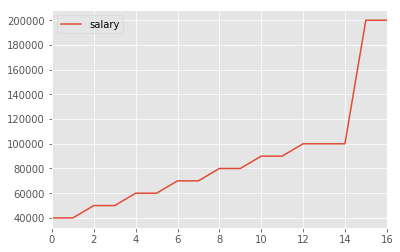

In [55]:
cur = conn.cursor()
cur.execute('select name, salary from employee.employee_details')
df = as_pandas(cur)

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

df.plot()

In [35]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [47]:
%config SqlMagic.autocommit=False
%sql impala://192.168.101.41:21050/employee

'Connected: None@employee'

In [48]:
%sql SELECT * from employee.employee_details

DBAPIError: (impala.error.HiveServer2Error) AnalysisException: Syntax error in line 1:
commit
^
Encountered: IDENTIFIER
Expected: ALTER, COMPUTE, CREATE, DELETE, DESCRIBE, DROP, EXPLAIN, GRANT, INSERT, INVALIDATE, LOAD, REFRESH, REVOKE, SELECT, SET, SHOW, TRUNCATE, UPDATE, UPSERT, USE, VALUES, WITH

CAUSED BY: Exception: Syntax error

[SQL: commit]
(Background on this error at: http://sqlalche.me/e/dbapi)

In [9]:
Employee_name="test21"

%%sql 
select * from employee_details where name=:Employee_name

SyntaxError: invalid syntax (<ipython-input-9-9a589eb23cf4>, line 4)

In [10]:
myResultSet=%sql select ename "Employee Name", sal "Salary" from emp

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

myResultSet.bar()

 * impala://192.168.101.41:21050/employee


DBAPIError: (impala.error.HiveServer2Error) AnalysisException: Could not resolve table reference: 'emp'

[SQL: select ename "Employee Name", sal "Salary" from emp]
(Background on this error at: http://sqlalche.me/e/dbapi)

In [11]:
my_DataFrame=myResultSet.DataFrame()

NameError: name 'myResultSet' is not defined

In [ ]:
my_DataFrame.head()